<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Explorando_Nasdaq_Data_Link.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
!pip install nasdaq-data-link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import nasdaqdatalink
import yfinance as yf
nasdaqdatalink.read_key('h3QLVaorrV7DJJQK6SLx')

In [3]:
selic = nasdaqdatalink.get('BCB/432', start_date = '2010-01-01')

In [4]:
selic.head()

,Value
Date,
2010-01-01,8.75
2010-01-02,8.75
2010-01-03,8.75
2010-01-04,8.75
2010-01-05,8.75


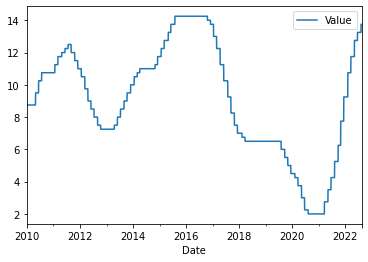

In [5]:
selic.plot()

In [12]:
ibov = yf.download('^BVSP', start = '2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
qd_ibov = nasdaqdatalink.get('bcb/7845', trim_start='2009-01-01')

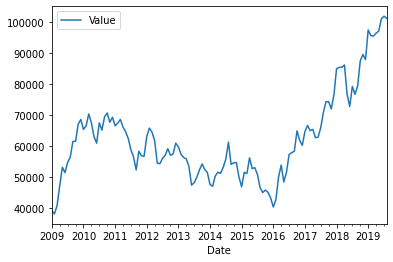

In [7]:
qd_ibov.plot()

In [13]:
qd_ipca = nasdaqdatalink.get('bcb/13522', trim_start='2009-01-01')

In [14]:
import matplotlib.pyplot as plt

In [18]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400


In [19]:
ibov['mean_volume'] = ibov.Volume.rolling(30).mean()

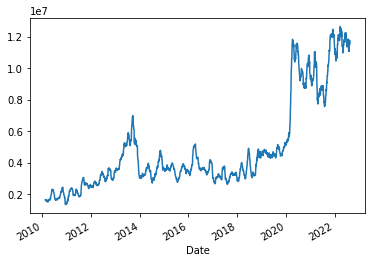

In [20]:
ibov['mean_volume'].plot()

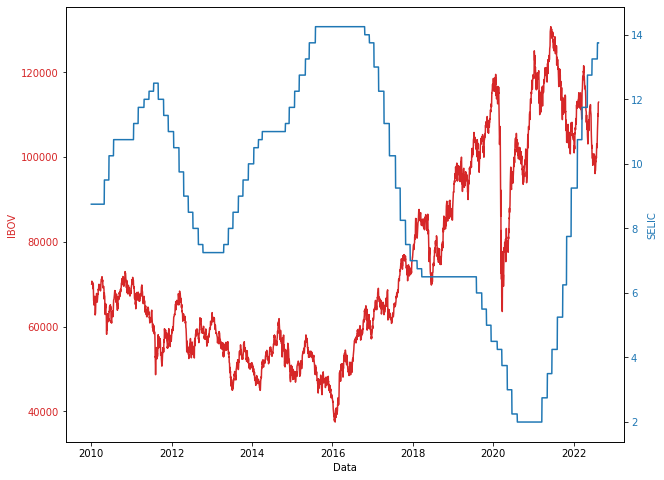

In [40]:
fig, ax1 = plt.subplots(figsize = (10,8))

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(ibov.Close, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color) 
ax2.plot(selic, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

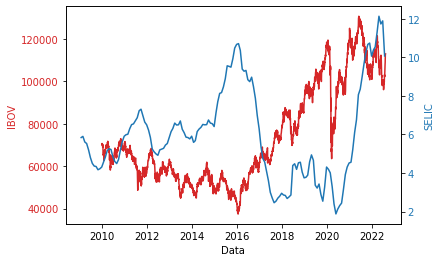

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(ibov.Close, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color) 
ax2.plot(qd_ipca, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

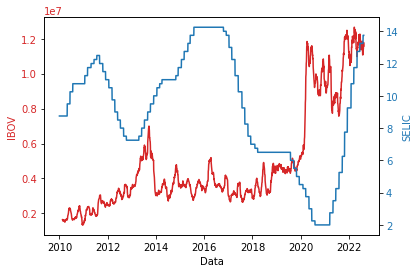

In [21]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('IBOV', color=color)
ax1.plot(ibov.mean_volume, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # Configurar um outro eixo vertical que compartilha o mesmo eixo X

color = 'tab:blue'
ax2.set_ylabel('SELIC', color=color) 
ax2.plot(selic, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [24]:
acoes = ['WEGE3.SA', 'MGLU3.SA', 'PETR4.SA', 'VALE3.SA', 'LREN3.SA', 'COCA34.SA']

In [37]:
dados_acoes = yf.download(acoes, start = '2020-04-01')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [38]:
dados_acoes

,COCA34.SA,LREN3.SA,MGLU3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,
2020-04-01,35.138756,30.623978,9.139965,7.762724,32.398422,15.737098
2020-04-02,35.077141,30.519527,8.752223,8.419570,31.957672,16.547491
2020-04-03,35.077141,29.399019,8.666871,8.327286,30.254459,15.960320
2020-04-06,35.077141,32.997929,9.315545,8.560710,32.219135,16.149574
2020-04-07,35.077141,35.134491,9.776446,8.902705,32.704700,18.100328
...,...,...,...,...,...,...
2022-08-09,53.930000,26.860001,3.080000,30.316000,66.550644,29.580000
2022-08-10,54.040001,27.969999,3.290000,30.218287,66.598183,30.680000
2022-08-11,54.230000,27.240000,3.040000,29.517998,68.917946,30.129999


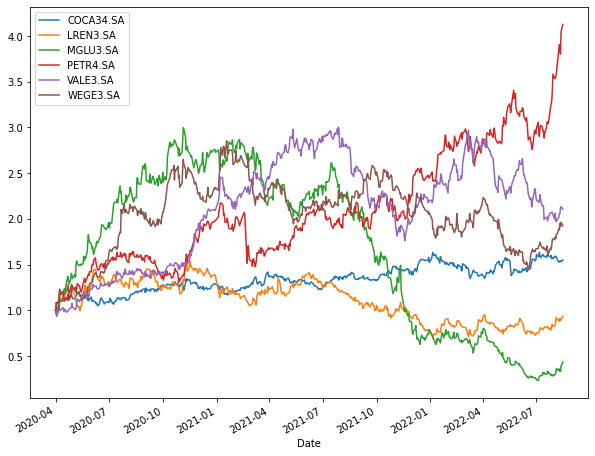

In [39]:
(dados_acoes/dados_acoes.iloc[0]).plot(figsize = (10,8));